#### generate visualization results of the comparison

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
comparison_table = pd.read_csv('comparison_table.csv')
compare_tissue_list = ['Adipose Subcutaneous','Artery Tibial','Breast Mammary Tissue','Colon Transverse','Nerve Tibial','Thyroid']
comparison_table.head()

,tissue,model,size,acc,precision,recall,f1,auc
0,Adipose Subcutaneous,finetune,small,0.821,0.895,0.773,0.829,0.909
1,Adipose Subcutaneous,finetune,middle,0.836,0.853,0.853,0.853,0.885
2,Adipose Subcutaneous,finetune,large,0.743,0.698,0.787,0.740,0.816
3,Adipose Subcutaneous,e2e,small,0.667,0.696,0.727,0.711,0.595
4,Adipose Subcutaneous,e2e,middle,0.541,0.579,0.647,0.611,0.495


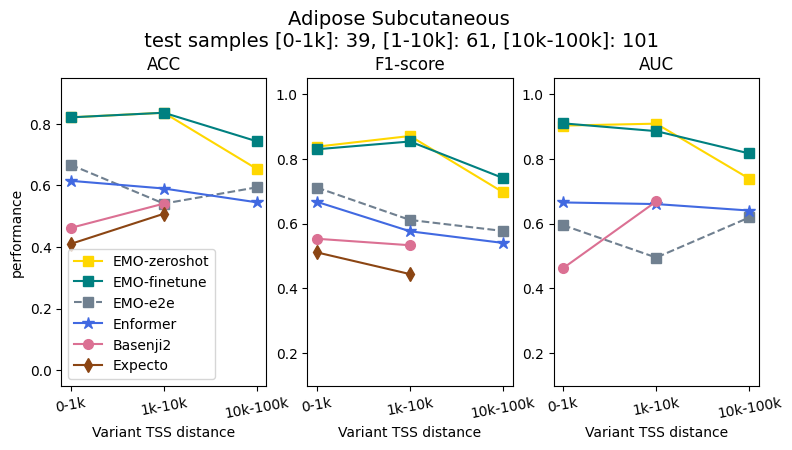

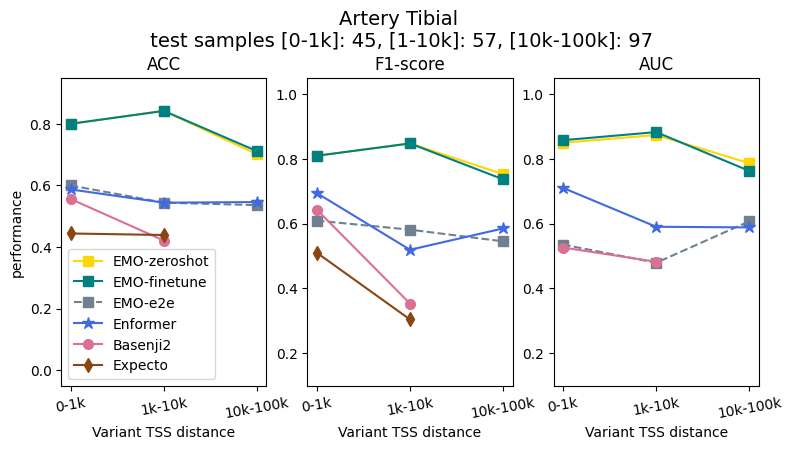

In [3]:
compare_tissue_list = ['Adipose Subcutaneous','Artery Tibial']
compare_dict = {'Adipose Subcutaneous':'Adipose_Subcutaneous','Artery Tibial':'Artery_Tibial'}

for tissue in compare_tissue_list:

    tissue_table = comparison_table[comparison_table['tissue'] == tissue]
    small_table = tissue_table[tissue_table['size'] == 'small']
    middle_table = tissue_table[tissue_table['size'] == 'middle']
    large_table = tissue_table[tissue_table['size'] == 'large']

    # get number of samples
    small_data = pd.read_pickle('../../datasets/tissue_specific/small/test_small_' + compare_dict[tissue] + '.pkl')
    middle_data = pd.read_pickle('../../datasets/tissue_specific/middle/test_middle_' + compare_dict[tissue] + '.pkl')
    large_data = pd.read_pickle('../../datasets/tissue_specific/large/test_large_' + compare_dict[tissue] + '.pkl')
    small_sample = len(small_data)
    middle_sample = len(middle_data)
    large_sample = len(large_data)


    fig = plt.figure(figsize=(9,4))
    x = np.arange(3) # small, middle, large

    # plot ACC
    plt.subplot(1, 3, 1)
    plt.title('ACC')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['acc'],
                middle_table[middle_table['model'] == 'zeroshot']['acc'],
                large_table[large_table['model'] == 'zeroshot']['acc']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['acc'],
                middle_table[middle_table['model'] == 'finetune']['acc'],
                large_table[large_table['model'] == 'finetune']['acc']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['acc'],
                middle_table[middle_table['model'] == 'e2e']['acc'],
                large_table[large_table['model'] == 'e2e']['acc']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['acc'],
                middle_table[middle_table['model'] == 'enformer']['acc'],
                large_table[large_table['model'] == 'enformer']['acc']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['acc'],
                 middle_table[middle_table['model'] == 'basenji2']['acc']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')
    plt.plot(x[:2], [small_table[small_table['model'] == 'expecto']['acc'],
                 middle_table[middle_table['model'] == 'expecto']['acc']],
                'd-', color='#8B4513', markersize=7, label='Expecto')

    plt.legend(loc = "best")
    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((-0.05, 0.95))
    
    plt.xlabel("Variant TSS distance")
    plt.ylabel("performance")

    # plot F1-score
    plt.subplot(1, 3, 2)
    plt.title('F1-score')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['f1'],
                middle_table[middle_table['model'] == 'zeroshot']['f1'],
                large_table[large_table['model'] == 'zeroshot']['f1']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['f1'],
                middle_table[middle_table['model'] == 'finetune']['f1'],
                large_table[large_table['model'] == 'finetune']['f1']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['f1'],
                middle_table[middle_table['model'] == 'e2e']['f1'],
                large_table[large_table['model'] == 'e2e']['f1']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['f1'],
                middle_table[middle_table['model'] == 'enformer']['f1'],
                large_table[large_table['model'] == 'enformer']['f1']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['f1'],
                 middle_table[middle_table['model'] == 'basenji2']['f1']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')
    plt.plot(x[:2], [small_table[small_table['model'] == 'expecto']['f1'],
                 middle_table[middle_table['model'] == 'expecto']['f1']],
                'd-', color='#8B4513', markersize=7, label='Expecto')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")

    # plot AUC
    plt.subplot(1, 3, 3)
    plt.title('AUC')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['auc'],
                middle_table[middle_table['model'] == 'zeroshot']['auc'],
                large_table[large_table['model'] == 'zeroshot']['auc']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['auc'],
                middle_table[middle_table['model'] == 'finetune']['auc'],
                large_table[large_table['model'] == 'finetune']['auc']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['auc'],
                middle_table[middle_table['model'] == 'e2e']['auc'],
                large_table[large_table['model'] == 'e2e']['auc']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['auc'],
                middle_table[middle_table['model'] == 'enformer']['auc'],
                large_table[large_table['model'] == 'enformer']['auc']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['auc'],
                 middle_table[middle_table['model'] == 'basenji2']['auc']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    
    plt.xlabel("Variant TSS distance")

    plt.suptitle(tissue + '\n test samples [0-1k]: ' + str(small_sample) + ', [1-10k]: ' + str(middle_sample) + ', [10k-100k]: ' + str(large_sample), fontsize=14,y=1.05)
    plt.savefig('images/' + tissue + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()

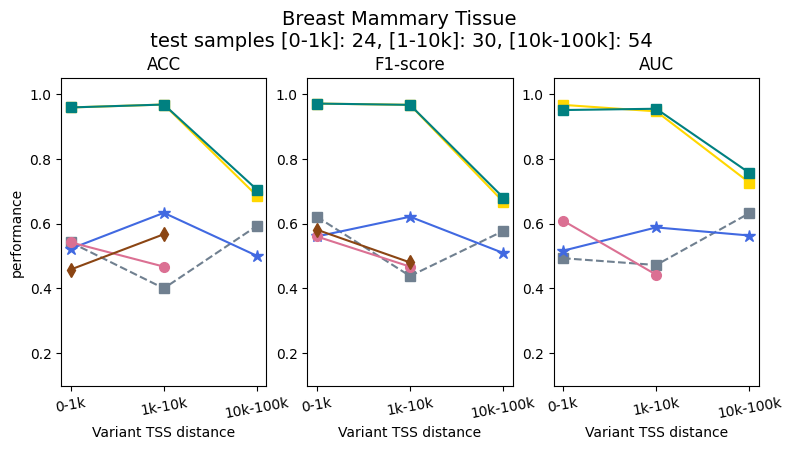

In [4]:
compare_tissue_list = ['Breast Mammary Tissue']
compare_dict = {'Breast Mammary Tissue':'Breast_Mammary_Tissue'}

for tissue in compare_tissue_list:

    tissue_table = comparison_table[comparison_table['tissue'] == tissue]
    small_table = tissue_table[tissue_table['size'] == 'small']
    middle_table = tissue_table[tissue_table['size'] == 'middle']
    large_table = tissue_table[tissue_table['size'] == 'large']

    # get number of samples
    small_data = pd.read_pickle('../../datasets/tissue_specific/small/test_small_' + compare_dict[tissue] + '.pkl')
    middle_data = pd.read_pickle('../../datasets/tissue_specific/middle/test_middle_' + compare_dict[tissue] + '.pkl')
    large_data = pd.read_pickle('../../datasets/tissue_specific/large/test_large_' + compare_dict[tissue] + '.pkl')
    small_sample = len(small_data)
    middle_sample = len(middle_data)
    large_sample = len(large_data)

    fig = plt.figure(figsize=(9,4))
    x = np.arange(3) # small, middle, large

    # plot ACC
    plt.subplot(1, 3, 1)
    plt.title('ACC')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['acc'],
                middle_table[middle_table['model'] == 'zeroshot']['acc'],
                large_table[large_table['model'] == 'zeroshot']['acc']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['acc'],
                middle_table[middle_table['model'] == 'finetune']['acc'],
                large_table[large_table['model'] == 'finetune']['acc']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['acc'],
                middle_table[middle_table['model'] == 'e2e']['acc'],
                large_table[large_table['model'] == 'e2e']['acc']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['acc'],
                middle_table[middle_table['model'] == 'enformer']['acc'],
                large_table[large_table['model'] == 'enformer']['acc']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['acc'],
                 middle_table[middle_table['model'] == 'basenji2']['acc']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')
    plt.plot(x[:2], [small_table[small_table['model'] == 'expecto']['acc'],
                 middle_table[middle_table['model'] == 'expecto']['acc']],
                'd-', color='#8B4513', markersize=7, label='Expecto')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")
    plt.ylabel("performance")

    # plot F1-score
    plt.subplot(1, 3, 2)
    plt.title('F1-score')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['f1'],
                middle_table[middle_table['model'] == 'zeroshot']['f1'],
                large_table[large_table['model'] == 'zeroshot']['f1']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['f1'],
                middle_table[middle_table['model'] == 'finetune']['f1'],
                large_table[large_table['model'] == 'finetune']['f1']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['f1'],
                middle_table[middle_table['model'] == 'e2e']['f1'],
                large_table[large_table['model'] == 'e2e']['f1']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['f1'],
                middle_table[middle_table['model'] == 'enformer']['f1'],
                large_table[large_table['model'] == 'enformer']['f1']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['f1'],
                 middle_table[middle_table['model'] == 'basenji2']['f1']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')
    plt.plot(x[:2], [small_table[small_table['model'] == 'expecto']['f1'],
                 middle_table[middle_table['model'] == 'expecto']['f1']],
                'd-', color='#8B4513', markersize=7, label='Expecto')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")

    # plot AUC
    plt.subplot(1, 3, 3)
    plt.title('AUC')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['auc'],
                middle_table[middle_table['model'] == 'zeroshot']['auc'],
                large_table[large_table['model'] == 'zeroshot']['auc']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['auc'],
                middle_table[middle_table['model'] == 'finetune']['auc'],
                large_table[large_table['model'] == 'finetune']['auc']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['auc'],
                middle_table[middle_table['model'] == 'e2e']['auc'],
                large_table[large_table['model'] == 'e2e']['auc']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['auc'],
                middle_table[middle_table['model'] == 'enformer']['auc'],
                large_table[large_table['model'] == 'enformer']['auc']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['auc'],
                 middle_table[middle_table['model'] == 'basenji2']['auc']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")
    plt.suptitle(tissue + '\n test samples [0-1k]: ' + str(small_sample) + ', [1-10k]: ' + str(middle_sample) + ', [10k-100k]: ' + str(large_sample), fontsize=14,y=1.05)
    
    plt.savefig('images/' + tissue + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()

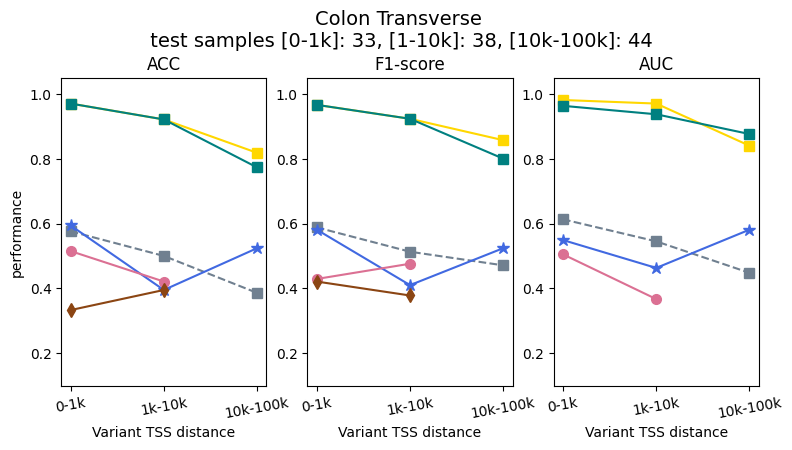

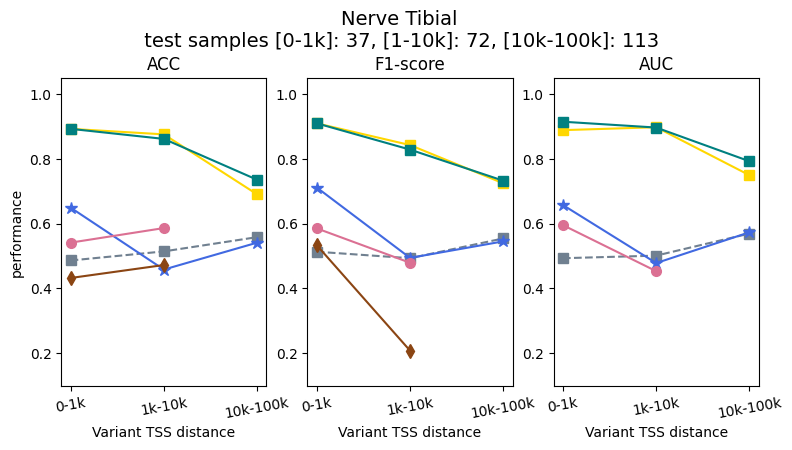

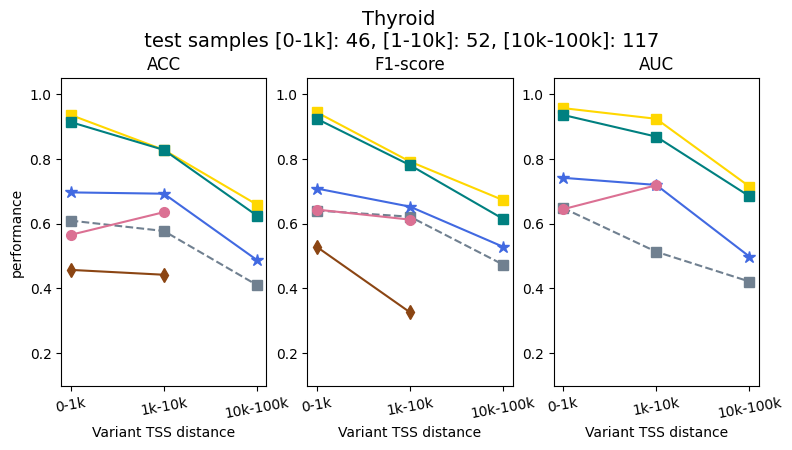

In [5]:
compare_tissue_list = ['Colon Transverse','Nerve Tibial','Thyroid']
compare_dict = {'Colon Transverse':'Colon_Transverse', 'Nerve Tibial':'Nerve_Tibial', 'Thyroid':'Thyroid'}

for tissue in compare_tissue_list:

    tissue_table = comparison_table[comparison_table['tissue'] == tissue]
    small_table = tissue_table[tissue_table['size'] == 'small']
    middle_table = tissue_table[tissue_table['size'] == 'middle']
    large_table = tissue_table[tissue_table['size'] == 'large']

    # get number of samples
    small_data = pd.read_pickle('../../datasets/tissue_specific/small/test_small_' + compare_dict[tissue] + '.pkl')
    middle_data = pd.read_pickle('../../datasets/tissue_specific/middle/test_middle_' + compare_dict[tissue] + '.pkl')
    large_data = pd.read_pickle('../../datasets/tissue_specific/large/test_large_' + compare_dict[tissue] + '.pkl')
    small_sample = len(small_data)
    middle_sample = len(middle_data)
    large_sample = len(large_data)

    fig = plt.figure(figsize=(9,4))
    x = np.arange(3) # small, middle, large

    # plot ACC
    plt.subplot(1, 3, 1)
    plt.title('ACC')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['acc'],
                middle_table[middle_table['model'] == 'zeroshot']['acc'],
                large_table[large_table['model'] == 'zeroshot']['acc']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['acc'],
                middle_table[middle_table['model'] == 'finetune']['acc'],
                large_table[large_table['model'] == 'finetune']['acc']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['acc'],
                middle_table[middle_table['model'] == 'e2e']['acc'],
                large_table[large_table['model'] == 'e2e']['acc']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['acc'],
                middle_table[middle_table['model'] == 'enformer']['acc'],
                large_table[large_table['model'] == 'enformer']['acc']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['acc'],
                 middle_table[middle_table['model'] == 'basenji2']['acc']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')
    plt.plot(x[:2], [small_table[small_table['model'] == 'expecto']['acc'],
                 middle_table[middle_table['model'] == 'expecto']['acc']],
                'd-', color='#8B4513', markersize=7, label='Expecto')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")
    plt.ylabel("performance")

    # plot F1-score
    plt.subplot(1, 3, 2)
    plt.title('F1-score')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['f1'],
                middle_table[middle_table['model'] == 'zeroshot']['f1'],
                large_table[large_table['model'] == 'zeroshot']['f1']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['f1'],
                middle_table[middle_table['model'] == 'finetune']['f1'],
                large_table[large_table['model'] == 'finetune']['f1']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['f1'],
                middle_table[middle_table['model'] == 'e2e']['f1'],
                large_table[large_table['model'] == 'e2e']['f1']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['f1'],
                middle_table[middle_table['model'] == 'enformer']['f1'],
                large_table[large_table['model'] == 'enformer']['f1']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['f1'],
                 middle_table[middle_table['model'] == 'basenji2']['f1']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')
    plt.plot(x[:2], [small_table[small_table['model'] == 'expecto']['f1'],
                 middle_table[middle_table['model'] == 'expecto']['f1']],
                'd-', color='#8B4513', markersize=7, label='Expecto')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")

    # plot AUC
    plt.subplot(1, 3, 3)
    plt.title('AUC')
    plt.plot(x, [small_table[small_table['model'] == 'zeroshot']['auc'],
                middle_table[middle_table['model'] == 'zeroshot']['auc'],
                large_table[large_table['model'] == 'zeroshot']['auc']],
                's-',color='#FFD700', markersize=7, label='EMO-zeroshot')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['auc'],
                middle_table[middle_table['model'] == 'finetune']['auc'],
                large_table[large_table['model'] == 'finetune']['auc']],
                's-',color='#008080', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['auc'],
                middle_table[middle_table['model'] == 'e2e']['auc'],
                large_table[large_table['model'] == 'e2e']['auc']],
                's--',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['auc'],
                middle_table[middle_table['model'] == 'enformer']['auc'],
                large_table[large_table['model'] == 'enformer']['auc']],
                '*-',color='#4169E1', markersize=9, label='Enformer')
    plt.plot(x[:2], [small_table[small_table['model'] == 'basenji2']['auc'],
                 middle_table[middle_table['model'] == 'basenji2']['auc']],
                'o-', color='#DB7093', markersize=7, label='Basenji2')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")

    plt.suptitle(tissue + '\n test samples [0-1k]: ' + str(small_sample) + ', [1-10k]: ' + str(middle_sample) + ', [10k-100k]: ' + str(large_sample), fontsize=14,y=1.05)
    plt.savefig('images/' + tissue + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()